In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from joblib import load
from sklearn.tree import plot_tree

Reading preprocessed database without onehot transformation and normalization

In [2]:
df = pd.read_csv('../global_preprocessed_without_onehot_and_norm.csv', encoding='ISO-8859-1')
row_count = df.shape[0]
column_count = df.shape[1]
df

,iyear,extended,region,nkill,nwound,attacktype1,nperps,suicide,success,gname,individual,targtype1
0,1970,0,2,1.0,0.0,1,0.0,0,1,0,0,14
1,1970,0,1,0.0,0.0,6,7.0,0,1,1,0,7
2,1970,0,5,1.0,0.0,1,0.0,0,1,2,0,10
3,1970,0,8,0.0,0.0,3,0.0,0,1,2,0,7
4,1970,0,4,0.0,0.0,7,0.0,0,1,2,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
171275,2017,0,11,1.0,2.0,2,1.0,0,1,2656,0,4
171276,2017,0,10,2.0,7.0,3,1.0,0,1,592,0,4
171277,2017,0,5,0.0,0.0,7,1.0,0,1,2926,0,14
171278,2017,0,6,0.0,0.0,3,1.0,0,0,2,0,2


Loading model that we fitted in fit.ipynb file

In [3]:
model = load("tree_model.joblib")

Splitting data into train and test (using the same random state as in fit.ipynb)

In [4]:
x = df.drop("extended", axis=1)
y = df['extended']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

Predicting values and estimating models (using confusion matrix)

/home/gleb/miniconda3/envs/rapids-23.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Text(58.222222222222214, 0.5, 'Truth')

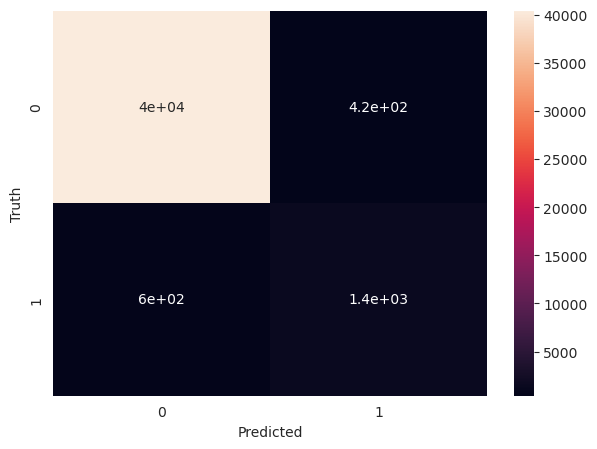

In [5]:
y_pred = model.predict(x_test.values)
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [6]:
x_test = x_test.drop("Predicted", axis=1)

Printing different metrics

In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     40832
           1       0.77      0.70      0.73      1988

    accuracy                           0.98     42820
   macro avg       0.88      0.85      0.86     42820
weighted avg       0.98      0.98      0.98     42820


Visualising decision tree model

        iyear  region  nkill  nwound  attacktype1  nperps  suicide  success  \
97808    2011      10    0.0     0.0            3     1.0        0        1   
122142   2014      10    1.0     2.0            3     1.0        0        1   
32313    1988       3    0.0     0.0            2     0.0        0        1   
90676    2010       6    0.0     1.0            3     1.0        0        1   
169951   2017      10    0.0     4.0            3     1.0        0        1   
...       ...     ...    ...     ...          ...     ...      ...      ...   
97639    2011       6    0.0     0.0            3     1.0        0        1   
95939    2011      10    1.0     0.0            2     1.0        0        1   
152315   2016       6    1.0     0.0            2     2.0        0        1   
117952   2013      10    6.0     0.0            3     1.0        0        1   
43567    1991       3    1.0     1.0            2     0.0        0        1   

        gname  individual  targtype1  
97808       

[Text(0.5335650084818131, 0.98, 'attacktype1 <= 3.5\nentropy = 0.271\nsamples = 128460\nvalue = [122509, 5951]'),
 Text(0.2967982597858198, 0.94, 'attacktype1 <= 2.5\nentropy = 0.044\nsamples = 105870\nvalue = [105356, 514]'),
 Text(0.1741598966026588, 0.9, 'gname <= 1761.5\nentropy = 0.082\nsamples = 42517\nvalue = [42086, 431]'),
 Text(0.07491691285081241, 0.86, 'iyear <= 1997.5\nentropy = 0.045\nsamples = 33352\nvalue = [33187, 165]'),
 Text(0.04593796159527327, 0.82, 'nperps <= 7.5\nentropy = 0.022\nsamples = 18201\nvalue = [18163, 38]'),
 Text(0.0310192023633678, 0.78, 'gname <= 968.5\nentropy = 0.016\nsamples = 17359\nvalue = [17333, 26]'),
 Text(0.02983751846381093, 0.74, 'attacktype1 <= 1.5\nentropy = 0.019\nsamples = 14796\nvalue = [14770, 26]'),
 Text(0.015952732644017725, 0.7, 'nkill <= 9.5\nentropy = 0.009\nsamples = 7843\nvalue = [7837, 6]'),
 Text(0.014771048744460856, 0.66, 'gname <= 154.0\nentropy = 0.008\nsamples = 7812\nvalue = [7807, 5]'),
 Text(0.013589364844903988,

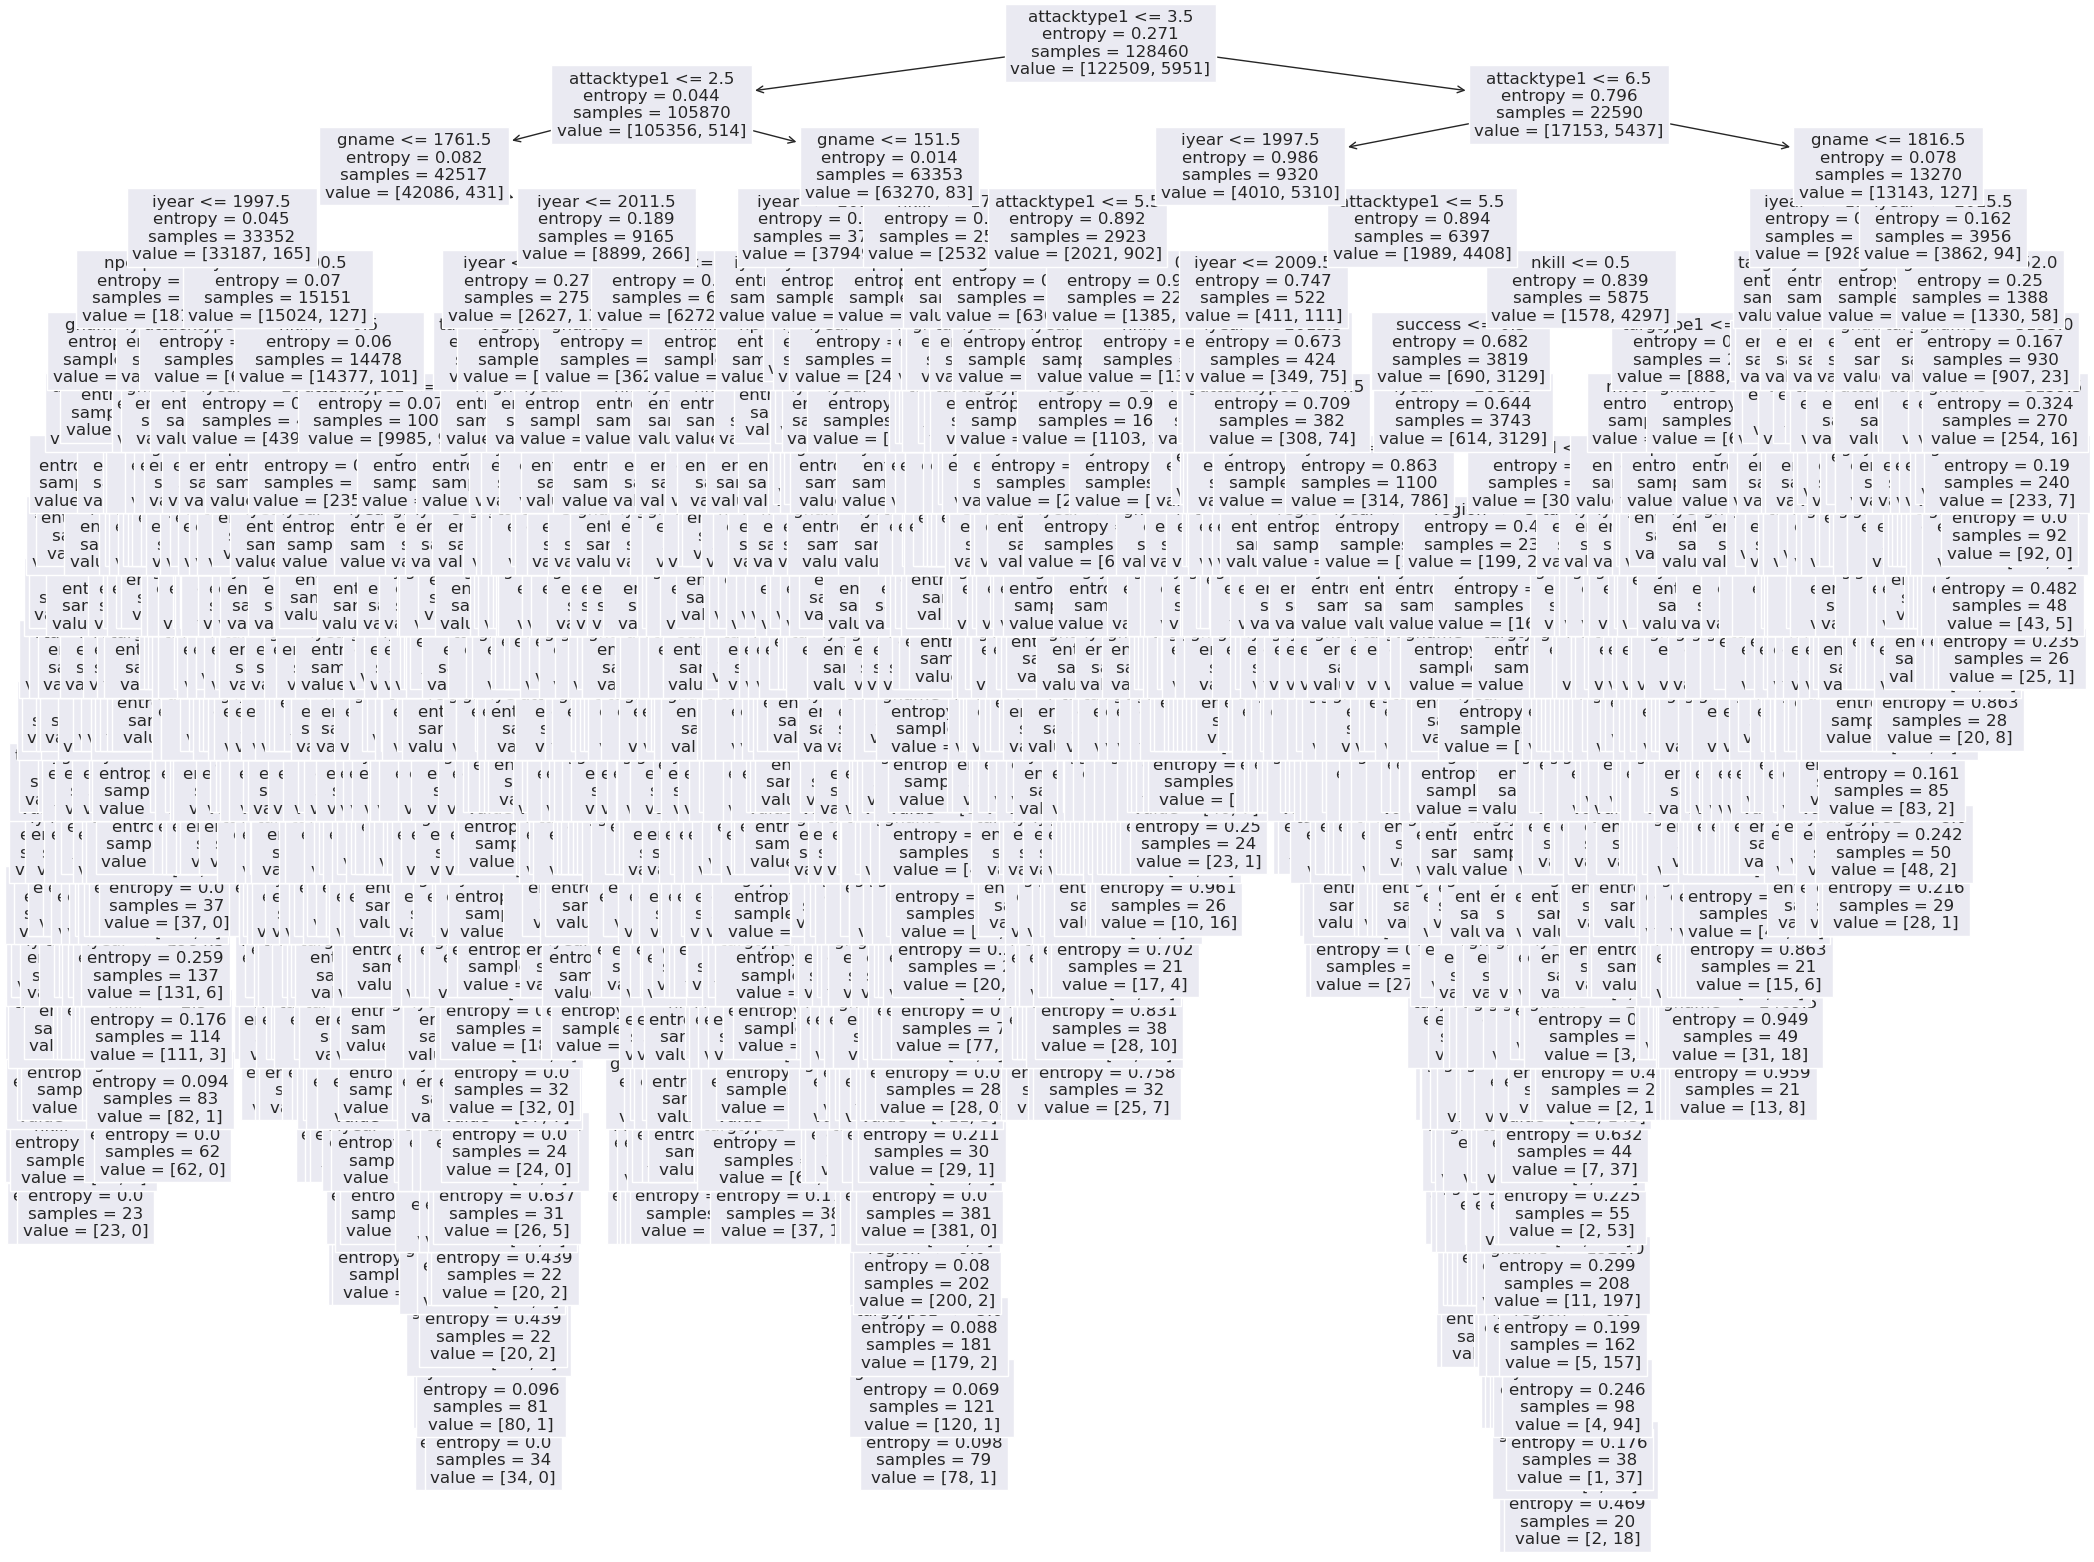

In [8]:
plt.figure(figsize=(25,20))
print(x_train)
plot_tree(model.best_estimator_, fontsize=12, feature_names=list(x_test.columns))